In [1]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [188]:
# df = pd.read_csv("/media/gegen07/Expansion/data/mestrado/next-cell-prediction/pontos_usuarios_sudeste_9000.csv")
df = pd.read_csv("/media/gegen07/Expansion/data/mestrado/gowalla/checkins_separated_categories/checkins_New York.csv")

In [189]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME,categoryid
0,5144,592233,2010-07-09T01:59:28Z,592233,2010-02-21T05:29:28Z,-73.986298,40.747811,0,28,26,75,0,1,10,"[{'url': '/categories/199', 'name': 'Hotel'}]",POINT (-73.9862982274 40.7478105501),38.0,New York,6
1,57563,592233,2011-04-17T21:56:31Z,592233,2010-02-21T05:29:28Z,-73.986298,40.747811,0,28,26,75,0,1,10,"[{'url': '/categories/199', 'name': 'Hotel'}]",POINT (-73.9862982274 40.7478105501),38.0,New York,6
2,53479,592233,2010-09-28T22:30:56Z,592233,2010-02-21T05:29:28Z,-73.986298,40.747811,0,28,26,75,0,1,10,"[{'url': '/categories/199', 'name': 'Hotel'}]",POINT (-73.9862982274 40.7478105501),38.0,New York,6
3,53479,592233,2010-09-28T00:57:55Z,592233,2010-02-21T05:29:28Z,-73.986298,40.747811,0,28,26,75,0,1,10,"[{'url': '/categories/199', 'name': 'Hotel'}]",POINT (-73.9862982274 40.7478105501),38.0,New York,6
4,53479,592233,2010-09-27T19:44:29Z,592233,2010-02-21T05:29:28Z,-73.986298,40.747811,0,28,26,75,0,1,10,"[{'url': '/categories/199', 'name': 'Hotel'}]",POINT (-73.9862982274 40.7478105501),38.0,New York,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612127,1545156,7479144,2011-06-07T18:09:01Z,7479144,2011-06-07T18:08:09Z,-74.184087,42.971563,0,1,1,75,0,0,10,"[{'url': '/categories/16', 'name': 'American'}]",POINT (-74.1840872 42.9715629),38.0,New York,2
612128,466314,6388236,2010-11-06T17:53:49Z,6388236,2010-11-06T17:53:13Z,-77.659328,42.332399,0,1,1,75,0,0,10,"[{'url': '/categories/124', 'name': 'Diner'}]",POINT (-77.659328 42.332399),38.0,New York,2
612129,265578,1338952,2010-06-25T22:39:00Z,1338952,2010-06-25T22:38:49Z,-78.429726,42.080060,0,1,1,75,0,0,10,"[{'url': '/categories/16', 'name': 'American'}]",POINT (-78.42972588 42.08006042),38.0,New York,2
612130,328432,3225133,2010-09-06T13:21:11Z,3225133,2010-09-06T13:20:47Z,-73.616385,40.877282,0,1,1,35,0,0,10,"[{'url': '/categories/89', 'name': 'Craftsman'}]",POINT (-73.616385309 40.877282072),38.0,New York,0


In [190]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [191]:
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["weekday"] = df["datetime"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["datetime"].dt.day_of_year
df["year"] = df["datetime"].dt.year

In [192]:
# df = df[df["year"] == 2021]

In [193]:
df = df.sort_values(by=["userid", "datetime"], ascending=True)
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,geometry,index_right,NAME,categoryid,hour,minute,weekday,timeslot,day,year
28822,1,23261,2010-04-18 21:22:26,23261,2009-08-31T17:41:27Z,-73.782806,40.643885,236,9729,4751,...,POINT (-73.7828063965 40.6438845363),38.0,New York,6,21,22,6,41,108,2010
117522,1,93056,2010-04-18 22:34:20,93056,2009-11-11T12:20:56Z,-73.981895,40.762646,17,307,208,...,POINT (-73.9818947017 40.7626457881),38.0,New York,6,22,34,6,23,108,2010
244558,1,172247,2010-04-18 23:30:58,172247,2009-12-06T04:06:08Z,-73.981223,40.763513,5,53,48,...,POINT (-73.9812231727 40.7635127251),38.0,New York,3,23,30,6,24,108,2010
212910,1,105068,2010-04-19 13:38:34,105068,2009-11-16T01:46:15Z,-73.993421,40.741747,5,54,49,...,POINT (-73.993421425 40.7417466987),38.0,New York,2,13,38,0,14,109,2010
418444,1,851661,2010-04-19 13:59:27,851661,2010-04-02T14:59:29Z,-73.983757,40.742266,4,148,22,...,POINT (-73.9837574959 40.7422661063),38.0,New York,0,13,59,0,14,109,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584310,2686477,7418707,2011-06-21 23:17:57,7418707,2011-05-24T12:55:56Z,-74.010930,40.707648,0,4,4,...,POINT (-74.010929785 40.707647864),38.0,New York,0,23,17,1,45,172,2011
45825,2686477,72327,2011-06-22 00:02:19,72327,2009-10-31T22:10:02Z,-73.990988,40.734328,58,359,287,...,POINT (-73.9909882936 40.7343283909),38.0,New York,2,0,2,2,0,173,2011
276839,2686551,6542037,2011-06-25 22:17:48,6542037,2010-12-05T02:21:26Z,-73.974887,40.758155,21,75,55,...,POINT (-73.9748871856 40.7581545545),38.0,New York,6,22,17,5,43,176,2011
492262,2687099,1249637,2011-06-21 00:47:58,1249637,2010-06-09T16:14:05Z,-74.016738,40.705857,2,15,15,...,POINT (-74.0167383 40.705857267),38.0,New York,2,0,47,1,1,172,2011


In [194]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [195]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [196]:
df["userid"].unique()

array([      1,       2,       3, ..., 2686551, 2687099, 2687995])

<Axes: ylabel='Frequency'>

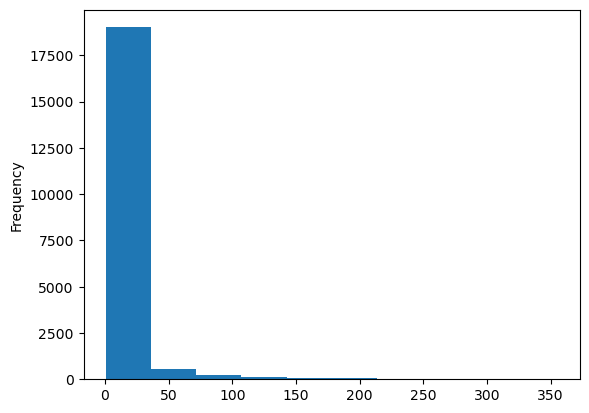

In [197]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [198]:
df.groupby("userid")["rank"].max().value_counts(ascending=False).head(20)

rank
1.0     5432
2.0     3374
3.0     2536
4.0     1801
5.0     1294
6.0      821
7.0      625
8.0      461
9.0      344
10.0     306
11.0     236
12.0     186
13.0     151
14.0     126
15.0     118
17.0     104
16.0      97
19.0      81
18.0      80
20.0      79
Name: count, dtype: int64

In [199]:
df['userid'].nunique()

20208

In [200]:
len(df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 20").userid.tolist())

2035

In [215]:
train = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 20").userid.tolist()))]

In [216]:
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,categoryid,hour,minute,weekday,timeslot,day,year,rank
249,67,12505,2010-05-23 16:33:59,12505,2009-05-04T01:46:49Z,-73.872006,40.774578,167,7691,3564,...,38.0,New York,6,16,33,6,17,143,2010,13.0
250,67,759510,2010-05-23 18:40:55,759510,2010-03-21T00:45:52Z,-73.989436,40.688719,3,61,48,...,38.0,New York,2,18,40,6,19,143,2010,13.0
251,67,107336,2010-05-23 19:50:25,107336,2009-11-17T02:14:02Z,-73.989095,40.688527,0,13,12,...,38.0,New York,5,19,50,6,20,143,2010,13.0
252,67,756880,2010-05-23 20:03:31,756880,2010-03-20T19:57:47Z,-73.985919,40.692662,2,82,25,...,38.0,New York,0,20,3,6,39,143,2010,13.0
253,67,74268,2010-05-24 00:01:23,74268,2009-11-02T01:24:52Z,-73.956289,40.714048,3,88,81,...,38.0,New York,2,0,1,0,0,144,2010,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395451,2647547,7163520,2011-06-22 22:48:31,7163520,2011-04-01T21:22:18Z,-74.234178,40.527301,1,11,2,...,38.0,New York,5,22,48,2,23,173,2011,19.0
395452,2647547,1370211,2011-06-27 01:13:32,1370211,2010-07-01T23:24:18Z,-74.074215,40.578739,7,13,11,...,38.0,New York,4,1,13,0,1,178,2011,20.0
395453,2647547,64203,2011-06-27 15:30:53,64203,2009-10-26T20:44:05Z,-74.072378,40.644178,21,283,198,...,38.0,New York,6,15,30,0,16,178,2011,20.0
395454,2647547,798390,2011-06-27 20:31:03,798390,2010-03-26T16:42:11Z,-73.989160,40.753753,4,32,28,...,38.0,New York,2,20,31,0,21,178,2011,20.0


In [217]:
train = train[train['rank'] <= 20].reset_index(drop=True)

In [218]:
train.sort_values(by=["userid", "rank"], ascending=True)

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,categoryid,hour,minute,weekday,timeslot,day,year,rank
35,67,477813,2011-01-01 21:15:18,477813,2010-01-30T15:08:44Z,-73.829623,40.661002,10,126,90,...,38.0,New York,6,21,15,5,41,1,2011,1.0
36,67,1597799,2011-01-02 15:19:27,1597799,2010-08-11T17:02:08Z,-73.987782,40.690572,1,6,5,...,38.0,New York,2,15,19,6,29,2,2011,2.0
37,67,23261,2011-01-02 22:06:05,23261,2009-08-31T17:41:27Z,-73.782806,40.643885,236,9729,4751,...,38.0,New York,6,22,6,6,43,2,2011,2.0
38,67,59040,2011-02-02 19:56:47,59040,2009-10-23T16:27:38Z,-74.008445,40.719840,14,116,95,...,38.0,New York,2,19,56,2,20,33,2011,3.0
39,67,223797,2011-02-02 20:28:21,223797,2009-12-17T18:16:11Z,-74.006700,40.719190,2,40,22,...,38.0,New York,2,20,28,2,39,33,2011,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69342,2647547,7163520,2011-06-22 22:48:31,7163520,2011-04-01T21:22:18Z,-74.234178,40.527301,1,11,2,...,38.0,New York,5,22,48,2,23,173,2011,19.0
69343,2647547,1370211,2011-06-27 01:13:32,1370211,2010-07-01T23:24:18Z,-74.074215,40.578739,7,13,11,...,38.0,New York,4,1,13,0,1,178,2011,20.0
69344,2647547,64203,2011-06-27 15:30:53,64203,2009-10-26T20:44:05Z,-74.072378,40.644178,21,283,198,...,38.0,New York,6,15,30,0,16,178,2011,20.0
69345,2647547,798390,2011-06-27 20:31:03,798390,2010-03-26T16:42:11Z,-73.989160,40.753753,4,32,28,...,38.0,New York,2,20,31,0,21,178,2011,20.0


In [219]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))
gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)
xmin, ymin, xmax, ymax= gdf.total_bounds
cell_size = 1000

# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [220]:
print(cell_size)

1000


In [221]:
cell["id"] = range(len(cell))

In [222]:
cell

,geometry,x,y,id
0,"POLYGON ((-8877188.999 4939655.672, -8877188.9...",0,0,0
1,"POLYGON ((-8877188.999 4940655.672, -8877188.9...",0,1,1
2,"POLYGON ((-8877188.999 4941655.672, -8877188.9...",0,2,2
3,"POLYGON ((-8877188.999 4942655.672, -8877188.9...",0,3,3
4,"POLYGON ((-8877188.999 4943655.672, -8877188.9...",0,4,4
...,...,...,...,...
599669,"POLYGON ((-8000188.999 5617655.672, -8000188.9...",877,678,599669
599670,"POLYGON ((-8000188.999 5618655.672, -8000188.9...",877,679,599670
599671,"POLYGON ((-8000188.999 5619655.672, -8000188.9...",877,680,599671
599672,"POLYGON ((-8000188.999 5620655.672, -8000188.9...",877,681,599672


In [223]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell.set_crs(3857), how='left', predicate='intersects')

In [224]:
merged[["userid", "timeslot", "rank", "x", "y"]]

,userid,timeslot,rank,x,y
0,67,17,13.0,653,39
1,67,19,13.0,640,26
2,67,20,13.0,640,26
3,67,39,13.0,641,27
4,67,0,14.0,644,30
...,...,...,...,...,...
69342,2647547,23,19.0,613,3
69343,2647547,1,20.0,631,10
69344,2647547,16,20.0,631,20
69345,2647547,21,20.0,640,36


In [225]:
merged[["userid", "timeslot", "rank", "x", "y"]].to_csv("new_york_sample_1km.csv", index=False)

In [211]:
merged[["userid", "timeslot", "rank", "x", "y"]]

,userid,timeslot,rank,x,y
249,67,17,13.0,653,40
250,67,19,13.0,640,27
251,67,20,13.0,640,27
252,67,39,13.0,641,27
253,67,0,14.0,644,31
...,...,...,...,...,...
395451,2647547,23,19.0,613,3
395452,2647547,1,20.0,631,11
395453,2647547,16,20.0,631,20
395454,2647547,21,20.0,640,36
